# Hacking the Humanities Week 2: Analysing Text

Now you are a master of Python and of Jupyter notebooks, it is time to start working with some text data.

From a computer's perspective, a text is simply a string of characters: `"We slept in what had once been the gymnasium."` In this and the workshops to follow, we will learn how to take a string of charactrs, and transform them so a computer can find interesting patterns in them.

## Section 1: Types and Tokens

The most important distinction in text analysis is the distinction between **types** and **tokens**:
* A **type** is a unique word with a particular sense, as it appears in the dictionary, e.g. "dune", meaning "mound of sand".
* A **token** is a particular word in a text, e.g. the 10th word of Aphra Behn's *The Rover*, which happens to be "different".

Here is an example. Take these two sentences from Alexis Wright's *[Carpentaria](https://en.wikipedia.org/wiki/Carpentaria_%28novel%29)*:

```
The single shrill cry of a windswept bird startled Will Phantom and he stopped dead in his tracks just to listen to it. The poor bird cried continuously as it was pushed further away in sheets of misty rain.
```

This sentence contains 39 tokens, but only 33 types This is because six of the types appear twice: `"bird"`, `"in"`, `"it"`, `"of"`, `"the"`, and `"to"`.

### Assignment 2.1: Tokenise a string

The first step in text analysis is to tokenise the text. In Python, as in other programming langauges, a string is treated as an unbroken series of characters. In this form it is very difficult to carry out any sort of useful digital analysis. Once you have split a string into tokens, however, it becomes possible to start analysing the distribution of individual words, and things start to get interesting.

In Week 1 we covered **methods**, and we saw that the `str` object has a useful method called `.join()`. There are many other [useful string methods](https://docs.python.org/3/library/stdtypes.html#string-methods) you will get to know if you spend time analysing text in Python. The one we need now is [.split()](https://docs.python.org/3/library/stdtypes.html#str.split).

Your task:

1. Create a variable called `my_string`, and assign it a sentence or two of text. If you need inspiration, you can try [one of these famous fictional endings](https://www.washingtonpost.com/graphics/2019/entertainment/books/best-last-lines/).
2. Use the `.split()` method to split `my_string` into tokens, and save the result in a variable called `my_tokens`.

In [1]:
### BEGIN SOLUTION
my_string = 'We slept in what had once been the gymnasium.'
my_tokens = my_string.split()
### END SOLUTION

In [2]:
print(f'Your string before tokenisation: {my_string}')
print(f'Your string after tokenisation: {my_tokens}')
### BEGIN HIDDEN TESTS
assert isinstance(my_string, str)
assert isinstance(my_tokens, list)
assert my_tokens == my_string.split()
### END HIDDEN TESTS

Your string before tokenisation: We slept in what had once been the gymnasium.
Your string after tokenisation: ['We', 'slept', 'in', 'what', 'had', 'once', 'been', 'the', 'gymnasium.']


Expected output (with your chosen sentence or sentences):
```
Your string before tokenisation: We slept in what had once been the gymnasium.
Your string after tokenisation: ['We', 'slept', 'in', 'what', 'had', 'once', 'been', 'the', 'gymnasium.']
```

Now that you have tokenised your sentence, it is in the form of a `list`. With your words in a `list`, you are now able to access them individually, allowing you to count and manipulate them as you please.

One of the most basic and useful operations you can perform on a list is `indexing`. Using indexing, you can inspect the contents of a list, looking at a particular item in the list, or a particular range of items. If your `list` only has a few items, you can of course easily print it to the screen. But once you start analysing entire poems, plays, novels or other books, your `lists` may get too long to display on screen. To know what your `list` looks like, you will need to be able to dip in and take a look.

To 'index into' a `list`, you simply use square brackets after the list, and type in the number for the item you want:

In [3]:
a_list_of_numbers = [7,22,3,81,999,0,10]
a_list_of_numbers[1]

22

As you can see, Python, like many other programming languages, counts from `0`. If you type `my_list[1]`, you will therefore retrieve the second item.

You can also count from the *end* of a list using negative numbers. There is no such thing as `-0`, so if you want the final word in a list, you use `-1`:

In [4]:
a_list_of_numbers[-1]

10

You can retrieve a range of items using a colon, `:`. This is called 'slicing' rather than 'indexing'.

In [5]:
a_list_of_numbers[0:2]

[7, 22]

As you can see, if you ask for items `[0:2]`, Python will return the '0th' item and the '1st' item, stopping just before the '2nd' item. This is probably not the behaviour you expect, but it does start to make sense when you start to write more complex Python programs.

What do you think the following will do?

In [6]:
a_list_of_numbers[5:]

[0, 10]

### Assignment 2.2: Indexing and slicing `my_tokens`

For this assignment, you are going to practise indexing and slicing your `my_tokens` list from above. To complete the task, you need to create three variables:

1. A variable called `first_word`, which contains the first word of `my_tokens`.
2. A variable called `penultimate_word`, which contains the second-last word.
3. A variable called `second_and_third_words`, which contains the second and third words.

In [7]:
### BEGIN SOLUTION
first_word = my_tokens[0]
penultimate_word = my_tokens[-2]
second_and_third_words = my_tokens[1:3]
### END SOLUTION

In [8]:
print(f'My sentence is: {my_string}')
print(f'The first word is: "{first_word}".')
print(f'The penultimate word is: "{penultimate_word}".')
print(f'The second and third words are: {second_and_third_words}.')
### BEGIN HIDDEN TESTS
assert first_word == my_tokens[0]
assert penultimate_word == my_tokens[-2]
assert second_and_third_words == my_tokens[1:3]
### END HIDDEN TESTS

My sentence is: We slept in what had once been the gymnasium.
The first word is: "We".
The penultimate word is: "the".
The second and third words are: ['slept', 'in'].


Expected output (with your example text):
```
My sentence is: We slept in what had once been the gymnasium.
The first word is: "We".
The penultimate word is: "the".
The second and third words are: ['slept', 'in'].
```

Now that we have learned how to tokenise text, we need to work out how to get from tokens to types. We know how to find out what the 233rd word of a novel is, but how do we find out how many times a particular author uses the word 'gooseberry'? How could we answer the whether Shakespeare or James Joyce's vocabulary is larger?

We humans have no trouble making all sorts of interesting comparisons and distinctions between words. Computers have a very hard time. There are two main reasons:

1. Tokens have ambiguous boundaries. Is `"isn't"` one token (`"isn't"`), or is it two (`["is", "n't"]`)?
2. There is no single agreed set of types. Are `"isn't"` and `"is not"` the same word? How about `"isn't"` and `"aren't"`?

The problem is even harder in [agglutinative languages](https://en.wikipedia.org/wiki/Agglutinative_language). Consider these examples from Swahili:
* *ninakuhitaji* means 'I need you' – *ni-na-ku-hitaji*, 'I-[present tense]-you-need'
* *mlikihitaji* means 'you guys needed it' – *m-li-ki-hitaji*, 'you (plural)-[past tense]-it-need'

How many tokens and/or types are we talking about in this case?

As you get further into text analysis, you will need to decide for yourself what is the right way to divide up tokens, and classify them into types, given the particular problem you are trying to solve. For the following assignment, you are going to solve the simplest and most common tokenisation problem in English: capitalisation. By default, Python is case sensitive:

In [9]:
'Enterprise' == 'enterprise'

False

Sometimes capital letters matter, of course. 'Rose' is a girl's name, whereas 'rose' is the name of a flower. And of course it might be relevant which words a writer uses to begin a sentence or a line of poetry, two common places where letters are capitalised. But for many tasks, capital letters get in the way.

### Assignment 2.3: Preprocess a string and count a particular type

For this assignment, you are going to analyse Wallace Stevens' poem *Nomad Exquisite*. Here it is, as a single string of characters:

In [10]:
stevens_poem = """
As the immense dew of Florida
Brings forth
The big-finned palm
And green vine angering for life,

As the immense dew of Florida
Brings forth hymn and hymn
From the beholder,
Beholding all these green sides
And gold sides of green sides,

And blessed mornings,
Meet for the eye of the young alligator,
And lightning colors
So, in me, come flinging
Forms, flames, and the flakes of flames.
"""

To complete this task, you will consult Python's [string methods](https://docs.python.org/3/library/stdtypes.html#string-methods) page and its [list methods](https://docs.python.org/3/tutorial/datastructures.html) page. Your task is threefold:
1. **Put the supplied string into lower case:** Visit the [string methods](https://docs.python.org/3/library/stdtypes.html#string-methods) page of the Python documentation and find a method like `.split()` that will put all the characters in lower case. Then create a variable called `stevens_lower`, and save the lower-case version of the poem there.
2. **Tokenise the string**: Split `stevens_lower` into tokens and save it as a variable called `stevens_tokens`.
2. **Count the number of times `"and"` appears in the poem:** Visit the [list methods](https://docs.python.org/3/tutorial/datastructures.html) page of the Python documentation and find a method that lets you count items in a list. Count the number of times `"and"` appears in the poem, and store the result in a variable called `stevens_num_and`.

In [11]:
### BEGIN SOLUTION
stevens_lower = stevens_poem.lower()
stevens_tokens = stevens_lower.split()
stevens_num_and = stevens_tokens.count("and")
### END SOLUTION

In [12]:
print(f'In lower case, the first stanza looks like:\n{stevens_lower[0:98]}')
print(f'The first 10 tokens of the poem are: {stevens_tokens[:10]}\n')
print(f'The word "and" appears {stevens_num_and} times in "Nomad Exquisite".')
### BEGIN HIDDEN TESTS
assert stevens_lower == stevens_poem.lower()
assert stevens_tokens == stevens_lower.split()
assert stevens_num_and == stevens_tokens.count("and")
### END HIDDEN TESTS

In lower case, the first stanza looks like:

as the immense dew of florida
brings forth
the big-finned palm
and green vine angering for life,

The first 10 tokens of the poem are: ['as', 'the', 'immense', 'dew', 'of', 'florida', 'brings', 'forth', 'the', 'big-finned']

The word "and" appears 6 times in "Nomad Exquisite".


Expected output:
```
In lower case, the first stanza looks like:

as the immense dew of florida
brings forth
the big-finned palm
and green vine angering for life,

The first 10 tokens of the poem are: ['as', 'the', 'immense', 'dew', 'of', 'florida', 'brings', 'forth', 'the', 'big-finned']

The word "and" appears 6 times in "Nomad Exquisite".
```

If we had not put the poem in lower case, Python would have only found `"and"` once, because it would have overlooked the capitalised `"And"`s at the beginning of lines 4, 9, 10 and 12. If you play around with the data, you will quickly discover other problems. For instance, if you try to count the words `"beholder"` or `"big"`, you will get an answer of `0`. This is because the computer thinks that `"beholder,"` is different to `"beholder"`, and that `"big-finned"` is a single word.

Next week, in **Analysing Corpora**, we will learn how to use *regular expressions*, and the tokenisation functions provided by the Natural Language Toolkit. With these additional tools, you will be able to deal with punctuation and other similar issues more cleverly.

Nonetheless, the `.split()` method does let you change the splitting rule, and deal with some of these issues without the need for addtional functionality. If you want, [have a look at the documentation](https://docs.python.org/3/library/stdtypes.html#str.split), and then try the following extension activity.

### Extension 2.4: Experiment with different tokenisations

Trying altering the `sep` parameter of `.split()`, and see if you do the following. For the last exercise you will need to [find another string method](https://docs.python.org/3/library/stdtypes.html#string-methods) that lets you replace characters in a string. To test whether you've succeeded, create a new cell, index or slice your new variables, and `print()` them.

In [13]:
# Split the poem into individual lines:
stevens_lines = None

# Split the poem into seperate stanzas:
stevens_stanzas = None

# Strip out commas from stevens_lower, split into a list of tokens, then count the number of times 'sides' appears:
stevens_lower_no_commas = None
stenves_no_commas_tokens = None
stevens_n_sides = None

## Section 2: Importing data

So far we have been working with toy examples. Of course, for text analysis to be useful, you need to be able to use it on your research data. In this section we will learn how to download data into Python from a file on your computer. In the extension activity, if you like, you can experiment with downloading data directly from the internet.

In the folder for this session, I have provided the .txt files of two novels, Charlotte Brontë's *Jane Eyre* and the Australian classic, *Such is Life* by [Joseph Furphy](http://adb.anu.edu.au/biography/furphy-joseph-6261). These text files are from **[Project Gutenberg](https://gutenberg.org)**. Project Gutenberg has advantages and disadvantages. On the one hand, every text is proof-read by two different humans, so there are very few errors. But on the other hand, the metadata is very patchy: you don't always know what exactly you are analysing.

Importing data can be complex, and also to some extent dangerous. When you interact with a file outside Python, you are giving Python the ability to read and write information stored on your machine. Without taking proper care, you might import problematic data into your Python program, or corrupt or overwrite important files on your hard drive.

To mitigate some of these risks, it is customary in Python to use a [`with` statement](https://docs.python.org/3.8/reference/compound_stmts.html#the-with-statement) whenever you read or write to a file. A `with` statement is a little bit like the `def` and `class` statement we used in **Week 1**. When we use a `def` or `class` statement, we use indentation to indicate which lines of code are 'inside' the function or object, insulating them from the rest of the program. A `with` statement lets you do something similar, by creating a temporary 'context' for some code. The context is exited after the code has been executed:

In [14]:
with open('fruits.txt') as file:
    fruits = file.read()

print(fruits)

plum
gage
marrow
pumpkin
pear
grape


This code has opened the file `fruits.txt`, which is in the same folder as this notebook, and created a new variable called `fruits`. This variable persists even after we have left the `with` statement:

In [15]:
print(fruits)

plum
gage
marrow
pumpkin
pear
grape


But after the `with` statement is finished, the 'context' is exited, and the `file` variable is closed:

In [16]:
file.read()

ValueError: I/O operation on closed file.

This is good, because it ensures that we won't accidentally leave a connection to a file open, which could cause problems as our programs grow more complex. It is generally advised to keep connections open only when you actually need them.

### Assignment 2.5: Import the two novels

Your first exercise is to use open to find the novels and read in the text. The novels are stored in the files `jane_eyre.txt` and `such_is_life.txt`, which are in the same folder as this notebook.
* **Use `with` statements** You will need to use two `with` statements, one for each novel. Use "`as file`" both times.
* **Use `open()` with the correct parameters:** In the example, we used `open()` with only one parameter. Let's play it safe this time. Let's use `mode='r'` so that Python knows we only want to *read* the file, `encoding='utf-8'`, so Python interprets the text correctly, and `errors='ignore'`, so that it skips any corrupted characters in the file if there are any.
* **Give the variables the correct names:** When you read in the novels, store *Jane Eyre* in a variable called `jane_eyre` and *Such is Life* in a variable called `such_is_life`.

In [17]:
### BEGIN SOLUTION
with open('jane_eyre.txt' , mode='r', encoding='utf-8', errors='ignore') as file:
    jane_eyre = file.read()
with open('such_is_life.txt', mode='r', encoding='utf-8', errors='ignore') as file:
    such_is_life = file.read()
### END SOLUTION

In [18]:
print(f'jane_eyre is a {type(jane_eyre).__name__} object {len(jane_eyre):,} characters long.')
print(f'such_is_life is a {type(such_is_life).__name__} object {len(such_is_life):,} characters long.')
### BEGIN HIDDEN TESTS
assert isinstance(jane_eyre, str)
assert isinstance(such_is_life, str)
assert file.encoding == 'utf-8'
assert file.errors == 'ignore'
assert file.mode == 'r'
### END HIDDEN TESTS

jane_eyre is a str object 1,049,267 characters long.
such_is_life is a str object 922,650 characters long.


Now we have loaded the two novels into memory, we can start to do some more interesting analysis. To start off, we can try to get a sense of the different ways Charlotte Brontë and Joseph Furphy use the English language. How long is each novel, and which novelist uses the larger vocabulary?

Execute the cell below to put the novels into lowercase and tokenise them. You can see how we can use 'method chaining' to make our code more concise.

In [19]:
jane_eyre_tokens = jane_eyre.lower().split()
such_is_life_tokens = such_is_life.lower().split()

### Assignment 2.6: Who has the larger vocabulary?

*Jane Eyre* is famous for its focus on a single developing mind, and its intense emotional narrative. *Such is Life* is famous for its witty allusions, pretentious irony and use of dialect. Hopefully we should be able to detect some of these differences between the novels.

Your task:
1. Use the `len()` function on the tokenised version of each novel to calculate their word counts. [Here is the documentation](https://docs.python.org/3/library/functions.html#len). Store the results in variables called `jane_eyre_word_count` and `such_is_life_word_count`.
2. Use the `set()` function on the tokenised version to extract each novel's unique types. [Here is the documentation](https://docs.python.org/3/library/functions.html#set). This function creates a `set` object, [which is a bit like a list, but is unordered and each item in the set must be unique](https://docs.python.org/3/tutorial/datastructures.html#sets). Store the results in variables called `jane_eyre_types` and `such_is_life_types`.
3. Count the number of unique types in each set. Store the results in variables called `jane_eyre_vocab` and `such_is_life_vocab`.

In [20]:
### BEGIN SOLUTION
# Analyse Jane Eyre
jane_eyre_word_count = len(jane_eyre_tokens)
jane_eyre_types = set(jane_eyre_tokens)
jane_eyre_vocab = len(jane_eyre_types)
# Analyse Such is Life
such_is_life_word_count = len(such_is_life_tokens)
such_is_life_types = set(such_is_life_tokens)
such_is_life_vocab = len(such_is_life_types)
### END SOLUTION

In [21]:
print(f'"Jane Eyre" is {jane_eyre_word_count:,} words long, and has a vocabulary of {jane_eyre_vocab:,}.')
print(f'"Such is Life" is {such_is_life_word_count:,} words long, and has a vocabulary of {such_is_life_vocab:,}.')
### BEGIN HIDDEN TESTS
assert jane_eyre_word_count == len(jane_eyre_tokens)
assert jane_eyre_types == set(jane_eyre_tokens)
assert jane_eyre_vocab == len(jane_eyre_types)
assert such_is_life_word_count == len(such_is_life_tokens)
assert such_is_life_types == set(such_is_life_tokens)
assert such_is_life_vocab == len(such_is_life_types)
### END HIDDEN TESTS

"Jane Eyre" is 188,455 words long, and has a vocabulary of 27,088.
"Such is Life" is 159,602 words long, and has a vocabulary of 28,313.


### Extension 2.7: Lexical density

There is a programming challenge you are likely to encounter sooner or later: you read an interesting article, where a particular technique is described. The author tells you the mathematical formula, but doesn't provide the programming code!

One common statistic in computational linguistics is '[lexical density](http://en.wikipedia.org/wiki/Lexical_density)'. Here is the formula:

$$L = \frac{N_{types}}{N_{tokens}}$$

Can you impelement that in Python? Hopefully it's not too hard!

In [22]:
jane_eyre_L = None
such_is_life_L = None

One issue with lexical density is that the score tends to decrease the longer a text is. Even a freakish author with a vocabulary of 100,000 words would have a low score if they wrote a 900,000-word novel like *Clarissa* or *The Story of the Stone*. How would you address that problem?

## Section 3: Graphing gendered language using `pyplot`

Now that you have converted each novel into a list of words, you can begin to do some basic analysis. Charlotte Brontë is one of the great feminist novelists of the nineteenth century, while Joseph Furphy is more famous for his democratic nationalism. Both suffered from typical nineteenth-century attitudes towards race. Can we find any evidence of this using basic distant reading?

In this part of the notebook, we are going to use the `pyplot` module from the package `matplotlib`. As explained last week, `matplotlib` is not packaged with Python itself. If you install Python on your own laptop, you may need to install `matplotlib` separately. Here in CoCalc, however, it comes pre-installed. It is Python's standard plotting library, and knowing how to use it is an extremely useful skill in many domains.

### Assignment 2.8

This is a quick revision assignment. Thinking back to **Week 1**, can you import the `pyplot` module from `matplotlib`, and give it the nickname `plt`?

In [23]:
### BEGIN SOLUTION
from matplotlib import pyplot as plt
### END SOLUTION

In [24]:
plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

Expected output:
```
<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>
```

You can make [many kinds of beautiful graph](https://matplotlib.org/gallery.html) using `matplotlib`. For your first go at using the software, however, you are going to make a simple bar chart.

`matplotlib` makes strong use of Python's object-oriented programming paradigm. The basic pattern is to make repeated calls to the `plt` object, adding all the data and formatting to your graph that you want. Then, when the `plt` object is ready, you use the `plt.show()` method, which makes your plot appear:

### Practice 2.9

Have a look at the code below. Experiment with the `x` and `y` values, and experiment with different formatting options for the plot. You can find thorough documentation for the `pyplot` module [here](https://matplotlib.org/api/pyplot_summary.html), and you might like to have a go with some of the many [examples](https://matplotlib.org/gallery/index.html).

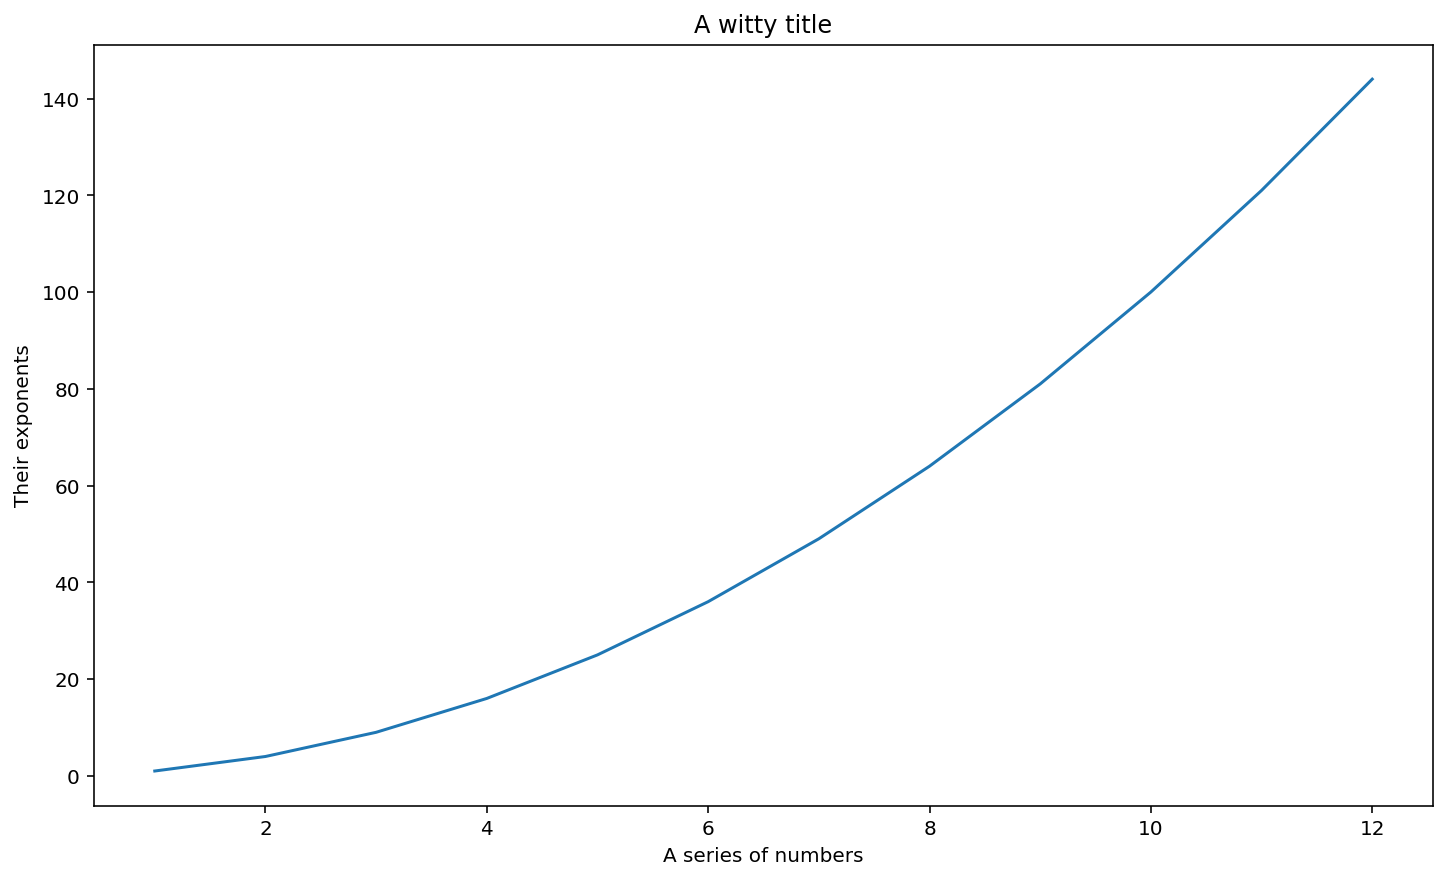

In [29]:
x = [1,2,3,4,5,6,7,8,9,10,11,12]
y = [1,4,9,16,25,36,49,64,81,100,121,144]

plt.plot(x, y)
plt.title("A witty title")
plt.xlabel("A series of numbers")
plt.ylabel("Their exponents")
plt.show()

Now for your first substantial piece of distant reading, you are going to compare gendered language in Brontë's *Jane Eyre* and Furphy's *Such is Life*. First we are going to extract some key statistics from the novels, and then plot them in a bar chart so they are easy to see.

### Assignment 2.10

First you are going to count the frequency of the words `"he"` and `"she"` in the two novels. You already have lower-case, tokenised versions of the novels called `jane_eyre_tokens` and `such_is_life_tokens`. (If your session has timed out, simply click <kbd>Validate</kbd> above, and all the preceding cells will be executed for you, restoring the variables.)

Your task: create four variables, `bronte_he`, `bronte_she`, `furphy_he` and `furphy_she`, which record the count for each of the relevant words in the relevant novel.

In [30]:
### BEGIN SOLUTION
bronte_he = jane_eyre_tokens.count('he')
bronte_she = jane_eyre_tokens.count('she')
furphy_he = such_is_life_tokens.count('he')
furphy_she = such_is_life_tokens.count('she')
### END SOLUTION

In [31]:
print(f'Charlotte Brontë uses the word "he" {bronte_he} times, and "she" {bronte_she} times.')
print(f'Joseph Furphy uses the word "he" {furphy_he} times, and "she" {furphy_she} times.')
### HIDDEN TESTS
assert bronte_he == jane_eyre_tokens.count('he')
assert bronte_she == jane_eyre_tokens.count('she')
assert furphy_he == such_is_life_tokens.count('he')
assert furphy_she == such_is_life_tokens.count('she')
### END OF HIDDEN TESTS

Charlotte Brontë uses the word "he" 1749 times, and "she" 1321 times.
Joseph Furphy uses the word "he" 1510 times, and "she" 267 times.


Expected output:
```
Charlotte Brontë uses the word "he" 1749 times, and "she" 1321 times.
Joseph Furphy uses the word "he" 1510 times, and "she" 267 times.
```

### Assignment 2.11

Perhaps you can already see some thought-provoking data just using the text output. It isn't always necessary to use a graph—sometimes the numbers alone can tell a vivid story. But for the sake of practice, let's turn these numbers into a bar graph.

Like a line graph, a bar graph needs two pieces of data: on the x-axis, a list of labels telling us what each column represents, and on the y-axis, a list of numbers telling us how high each column is.

Your task:
1. **Prepare your y-data:** Put your four variables, `bronte_he`, `bronte_she`, `furphy_he` and `furphy_she` into a `list` called `y_values`.
2. **Prepare your x-axis column labels:** On a bar graph, it is useful to have individual labels for each bar, showing exactly which category is represented by which one. Create a list called `x_values`, which should contain four strings, each one labelling a different column. **NB:** Make sure that these labels are in the same order as the values in `y_values`.
3. **Add the data to your plot:** Use `plt.bar()` to create a bar plot. It expects at least two parameters, the values for x then y.
4. **Add a title and y-axis label to your plot:** Give your plot a title, and label the y-axis using the functions `plt.title()` and `plt.ylabel()`.
5. **Show your plot:** Display your plot using the appropriate method.

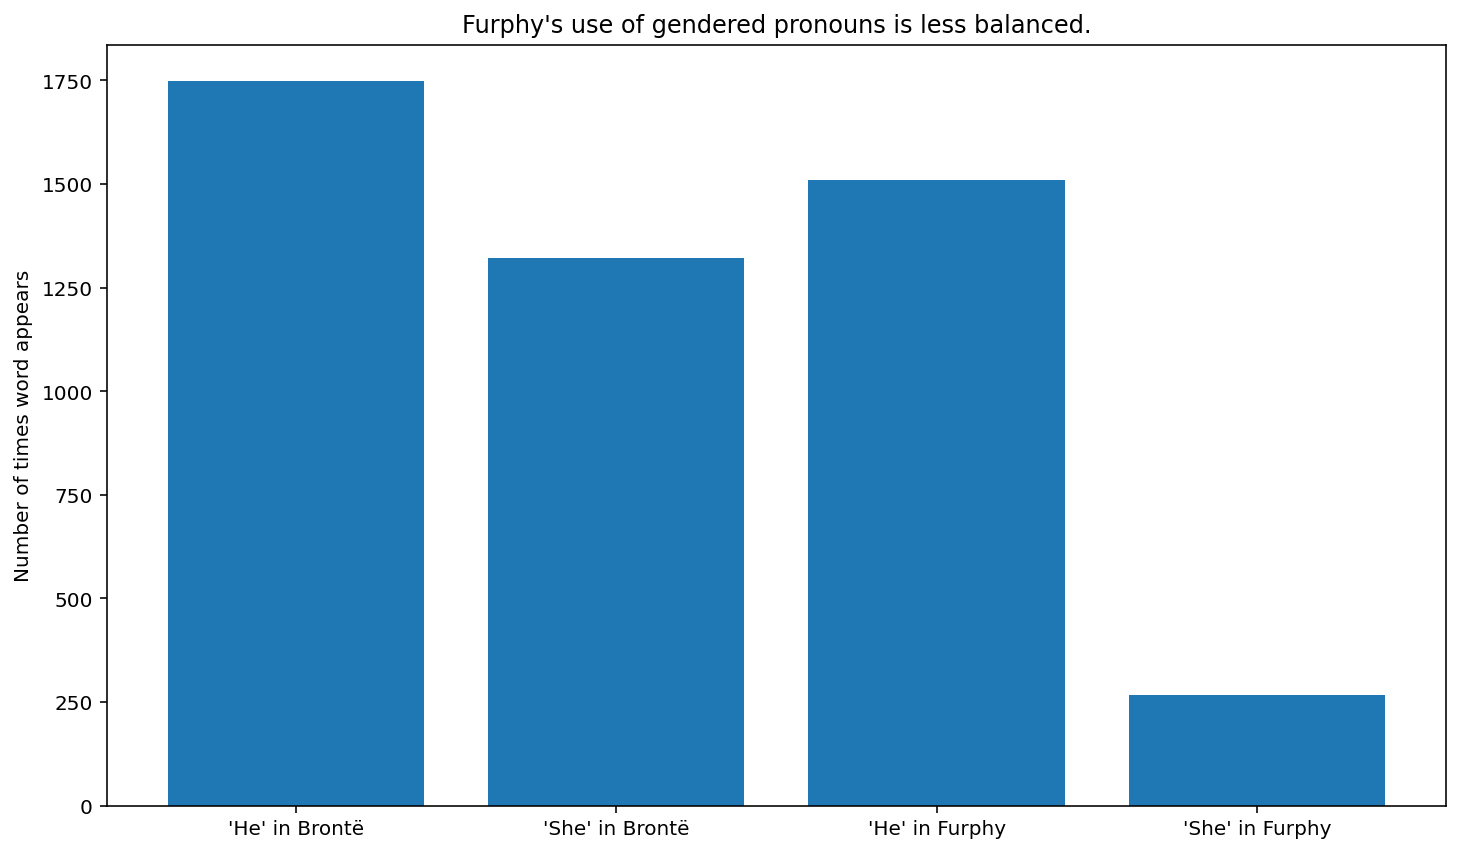

In [38]:
### BEGIN SOLUTION
x_values = ["'He' in Brontë", "'She' in Brontë", "'He' in Furphy", "'She' in Furphy"]
y_values = [bronte_he, bronte_she, furphy_he, furphy_she]
plt.bar(x = label_list, height = variable_list)
plt.title('Furphy\'s use of gendered pronouns is less balanced.')
plt.ylabel('Number of times word appears')
plt.show()
### END SOLUTION

Expected output:

<img src="week-2-figure-1.png" width="730" height="426">

### Assignment 2.12: Working with relative frequencies

Of course, this comparison could be unfair, because *Such is Life* has fewer words that *Jane Eyre*. It would therefore be better to base our analysis on the [relative frequency](https://en.wikipedia.org/wiki/Frequency_%28statistics%29).

To calculate the relative frequency, divide the number of `"he"`s or `"she"`s by the total number of words in each novel. If you recall the **operators** we studied last week, [you will remember which symbol you can use for division](https://docs.python.org/3/tutorial/introduction.html#numbers). In computational linguistics, it is standard to talk about word frequency per 1000 words, so you should multiply the result by 1000. Here is the formula:

$$relative frequency = \frac{frequency\ of\ word}{total\ words} \times 1000 $$

Your task:
* **Divide the `"he"`s and `"she"`s by the total word count for each novel:** Multiply your results by `1000`, so that the frequencies are expressed in 'frequency per 1000 words'. Save the results in new variables called `bronte_he_relative`, `bronte_she_relative`, `furphy_he_relative` and `furphy_she_relative`.
* **Reproduce your graph with the relative frequencies insteaad:** You can copy and paste your code from above. You will just need to replace `y_values` with a new variable called `y_values_relative`, and you might like to change the y-axis label.

[You will only be marked on the first part of the task.]

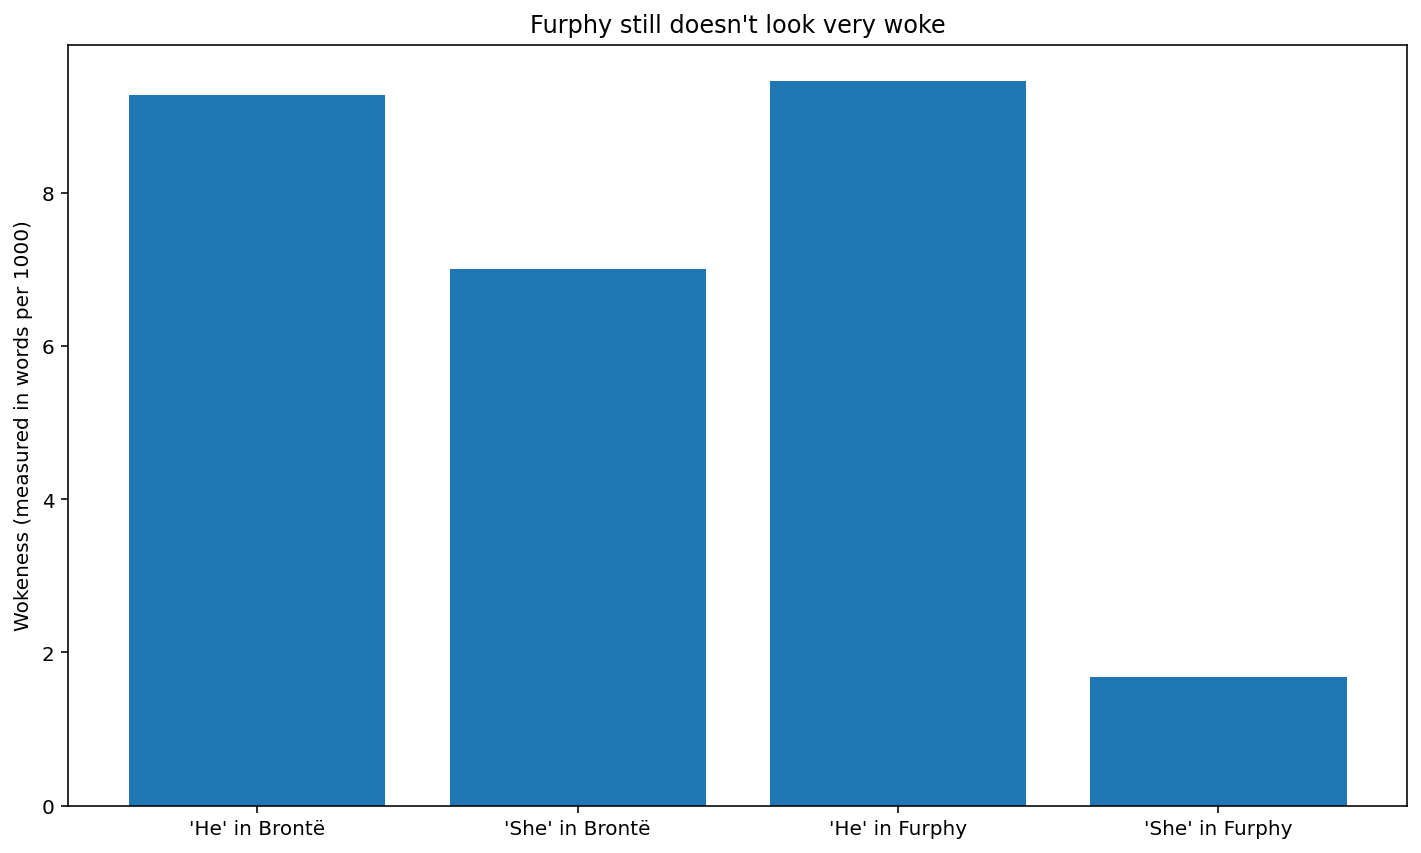

In [40]:
# YOUR CODE HERE:
bronte_he_relative = bronte_he/jane_eyre_word_count*1000
bronte_she_relative = bronte_she/jane_eyre_word_count*1000
furphy_he_relative = furphy_he/such_is_life_word_count*1000
furphy_she_relative = furphy_she/such_is_life_word_count*1000
y_values_relative = [bronte_he_relative, bronte_she_relative, furphy_he_relative, furphy_she_relative]
plt.bar(label_list, relative_variable_list)
plt.title('Furphy still doesn\'t look very woke')
plt.ylabel('Wokeness (measured in words per 1000)')
plt.show()
# END OF YOUR CODE

In [51]:
print(f'Relative frequency of `he` in "Jane Eyre": {bronte_he_relative:.2f} per 1000 words')
print(f'Relative frequency of `she` in "Jane Eyre": {bronte_she_relative:.2f} per 1000 words')
print(f'Relative frequency of `he` in "Such is Life": {furphy_he_relative:.2f} per 1000 words')
print(f'Relative frequency of `she` in "Such is Life": {furphy_she_relative:.2f} per 1000 words')
### BEGIN HIDDEN TESTS
assert bronte_he_relative == bronte_he/jane_eyre_word_count*1000
assert bronte_she_relative == bronte_she/jane_eyre_word_count*1000
assert furphy_he_relative == furphy_he/such_is_life_word_count*1000
assert furphy_she_relative == furphy_she/such_is_life_word_count*1000
### END HIDDEN TESTS

Relative frequency of `he` in "Jane Eyre": 9.28 per 1000 words
Relative frequency of `she` in "Jane Eyre": 7.01 per 1000 words
Relative frequency of `he` in "Such is Life": 9.46 per 1000 words
Relative frequency of `she` in "Such is Life": 1.67 per 1000 words


Expected output:

<img src="week-2-figure-2.png" width="730" height="426">

```
Relative frequency of `he` in "Jane Eyre": 9.28 per 1000 words
Relative frequency of `she` in "Jane Eyre": 7.01 per 1000 words
Relative frequency of `he` in "Such is Life": 9.46 per 1000 words
Relative frequency of `she` in "Such is Life": 1.67 per 1000 words
```

## Conclusion

You now have some of the key skills required to be a text analyst in Python. You can:
* Tokenise a string
* Pre-process the data for analysis, by removing capital letters
* Import text from a file
* Analyse word frequencies

Hopefully you have also started to think a bit more deeply about how the linguistic structure of a text is related to its meaning. Perhaps the relatives frequencies of `he` and `she` in *Jane Eyre* have something to do with its first-person perspective. And what meaning should we attach to gendered pronouns in *Such is Life*, a famously queer novel wih where women are often mistaken for men?

Next week you will extend your skills in text analysis, and deepen your knowledge of Python itself. You will go deeper into data structures, learning some of the ins and outs of `list`s and `dict`s. You will learn more about "control flow", which lets you write complex programs using only a few lines of code. You will learn to do more advanced kinds of tokenisation and pre-processing using regular expressions. And you will apply these skills so that you can analyse many texts at once, without needing to clutter your program with lots of different variables.

### Extension 2.13: Try out your analysis on some other novels

You now have a wide range of useful text analysis skills, and have the ability to import any textual data you like.

For this extension activity, you can try downloading other texts directly into Python, and playing around with some of the text analysis techniques you already know. You might like to analyse gendered language, by looking at the relative frequencies of gender pronouns: there are some we have overlooked, such as *her*, *him* and *his*. You could think about other sorts of words you are interested in too.

You could also try using the `Text()` object from the **Natural Language Toolkit**, which you had a play with last week. Remember, you will need to `import` the `Text` object from `nltk.text`. To create a `Text`, you need to provide the constructor with a list of tokens – luckily you now know how to tokenise a string!

To get another book from Project Gutenberg, you can use the `open()` function on the url to the text file. For instance, https://www.gutenberg.org/files/41445/41445-0.txt is the url to the text file of *Frankenstein*. If you want to `open()` a novel directly from a url, make sure that the url ends with "`.txt`".

In [0]:
with open("https://your url here") as file:
    another_novel = None